In [1]:
import caffe
import time
import numpy as np
import sys
import os
import random
%matplotlib notebook
import matplotlib.pyplot as plt
import math

#caffe.set_mode_gpu()
#caffe.set_device(1)
caffe.set_mode_cpu()
from mpl_toolkits.mplot3d import Axes3D

/home/sharpy/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
caffe.set_mode_cpu()
solver 			= caffe.get_solver("/home/sharpy/local-net/jupyter/tests/3dpyr/3dpyr-func-solver.prototxt")

def func(x):
    return 0.01 * x[0] * (x[1]-3)+10

In [4]:
def train():
    caffe.set_mode_cpu()
    start = time.time()
    for i in xrange(1,200):
        x = [random.uniform(-10, 10), random.uniform(-10, 10)]
        solver.net.blobs['in' ].data[ 0 ] = x
        solver.net.blobs['out'].data[ 0 ] = func(x) #0.01*( 0.2*x*(2 + x*x) - 10*x*(x-5)+x*2 + abs(x*x*(x+2)*2) -x*x*10 )
        solver.step(1)
    end = time.time()
    print  'in ' + str((end - start)) + ' s'

In [9]:
train()

start = time.time()

plt.cla()

for     i in np.linspace(-11,11, 30):
    y_c = []
    y2 = []
    x2, x_c = np.empty(shape=[0, 2]), np.empty(shape=[0, 2])

    for j in np.linspace(-11,11, 30):
        x = [i/10.,j/10.]
        solver.net.blobs['in' ].data[ 0 ] = x
        solver.net.blobs['out'].data[ 0 ] = func(x)
        x_c = np.append(x_c,  [ solver.net.blobs['in' ].data[ 0 ] ] , axis=0)
        y_c.extend( solver.net.blobs['out'].data[ 0 ] )
        solver.step(1)
        x2 = np.append(x2,  [ solver.net.blobs['in' ].data[ 0 ] ] , axis=0)
        y2.extend( solver.net.blobs['predicted_out'].data[ 0 ] )
        print solver.net.blobs['predicted_out' ].data[ : ]
    x2_swap = np.swapaxes(x2,0,1)
    x_c = np.swapaxes(x_c,0,1)

    # Source
    ax.plot(x_c[0], x_c[1], y_c, color='blue' )
    # Source
    #ax.scatter(x_c[0], x_c[1], y_c, marker='o', color='blue' )

    # Learned
    ax.plot(x2_swap[0],x2_swap[1], y2,  color='#00FF00' )
    # Learned
    #ax.scatter(x2_swap[0],x2_swap[1], y2,   marker='o', color='#FFFF00' )


end = time.time()
print  'in ' + str((end - start)) + ' s'

in 0.054456949234 s
[[ 9.24270916]]
[[ 9.28329086]]
[[ 9.324543]]
[[ 9.3637886]]
[[ 9.40088558]]
[[ 9.43594551]]
[[ 9.46909904]]
[[ 9.50047207]]
[[ 9.53018284]]
[[ 9.55833912]]
[[ 9.58504295]]
[[ 9.61039162]]
[[ 9.63446999]]
[[ 9.65736198]]
[[ 9.67914009]]
[[ 9.69987488]]
[[ 9.71962929]]
[[ 9.74057961]]
[[ 9.75323868]]
[[ 9.76272678]]
[[ 9.77179146]]
[[ 9.78048706]]
[[ 9.78764915]]
[[ 9.79242325]]
[[ 9.79741573]]
[[ 9.80232525]]
[[ 9.80712891]]
[[ 9.81183815]]
[[ 9.81646538]]
[[ 9.82102299]]
[[ 9.80846691]]
[[ 9.82504845]]
[[ 9.84093285]]
[[ 9.855793]]
[[ 9.86967373]]
[[ 9.88265228]]
[[ 9.89480019]]
[[ 9.90618324]]
[[ 9.91686344]]
[[ 9.92689228]]
[[ 9.93632126]]
[[ 9.94519329]]
[[ 9.95354748]]
[[ 9.96142101]]
[[ 9.96884346]]
[[ 9.97584724]]
[[ 9.98253441]]
[[ 9.98756027]]
[[ 9.9858799]]
[[ 9.98421478]]
[[ 9.98260021]]
[[ 9.98099136]]
[[ 9.97731781]]
[[ 9.97380257]]
[[ 9.97045231]]
[[ 9.96726513]]
[[ 9.96423912]]
[[ 9.96137333]]
[[ 9.95866776]]
[[ 9.95611858]]
[[ 9.94549465]]
[[ 9.95437

<IPython.core.display.Javascript object>


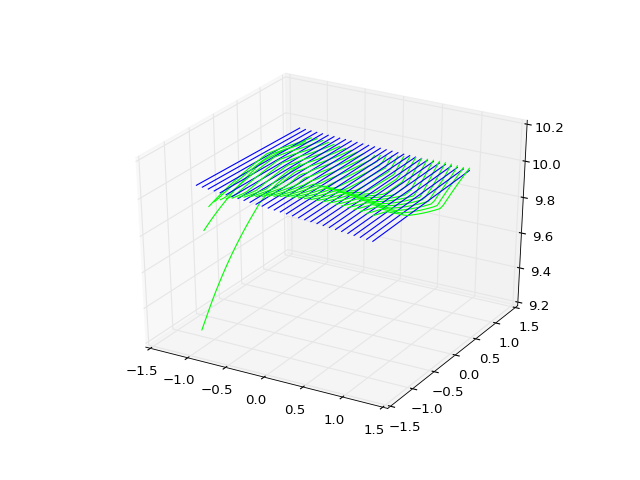

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [397]:
for i in xrange(0,5):
    train()

in 2.59455609322 s
in 2.50899815559 s
in 2.48396492004 s
in 2.46881389618 s
in 2.50591516495 s
in 2.49888801575 s
in 2.5469930172 s
in 2.43444681168 s
in 2.47374081612 s
in 2.50394201279 s


In [245]:
np.swapaxes(x2,0,1)

array([[ 8.79909611,  6.37979984, -6.90677786, ...,  9.7885828 ,
         6.28774548,  3.79564786],
       [-2.19237423,  8.68216228,  1.61938441, ..., -0.51793283,
        -4.20913744,  1.71394801]])

In [165]:
solver.net.blobs['in'].data[ 0 ]

array([-6.82744265, -9.03378868], dtype=float32)

In [133]:
a = np.zeros(shape=(0,0))

In [134]:
a

array([], shape=(0, 0), dtype=float64)

In [138]:
np.array([ solver.net.blobs['in' ].data[ 0 ] ])[0][0]

-7.9211564

In [135]:
a = np.append(a,  np.array([ solver.net.blobs['in' ].data[ 0 ] ]) , axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [151]:
x2 = np.empty(shape=[0, 2])

In [156]:
x2

array([[-7.92115641, -9.32932663],
       [-7.92115641, -9.32932663]])

In [153]:
np.array([ solver.net.blobs['in' ].data[ 0 ] ])

array([[-7.92115641, -9.32932663]], dtype=float32)

In [155]:
x2 = np.append(x2,  [ solver.net.blobs['in' ].data[ 0 ] ] , axis=0)

In [ ]:
x2 = np.append(x2,  [solver.net.blobs['in' ].data[ 0 ]])

In [116]:
x2

array([ 0.        ,  0.        , -7.92115641, -9.32932663, -7.92115641,
       -9.32932663])

In [65]:
x2 = np.zeros((2,2))

In [96]:
x2

array(2)

In [143]:
n = 2
X = np.empty(shape=[0, n])

for i in range(5):
    for j  in range(2):
        X = np.append(X, [ solver.net.blobs['in' ].data[ 0 ] ], axis=0)

print X


[[-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]
 [-7.92115641 -9.32932663]]


In [ ]:


caffe.set_mode_cpu()

start = time.time()


y_c = []
y2 = []
x2, x_c = np.empty(shape=[0, 2]), np.empty(shape=[0, 2])

print(x2)

for i in xrange(1,1000):
    x = [random.uniform(-10, 10), random.uniform(-10, 10)]
    #print rnd
    solver.net.blobs['in' ].data[ 0 ] = x
    #rnd-=2
    #solver.net.blobs['out'].data[ 0 ] = max(0, math.sqrt(rnd*rnd))
    #solver.net.blobs['out'].data[ 0 ] = math.sqrt(rnd*rnd)
    #solver.net.blobs['out'].data[ 0 ] = max(3, math.sqrt(rnd*rnd))
    solver.net.blobs['out'].data[ 0 ] = 0.001*x[0] * x[0] * (x[1]-3)+10 #+ 0.01*( 0.2*x*(2 + x*x) - 10*x*(x-5)+x*2 + abs(x*x*(x+2)*2) -x*x*10 )
    x_c = np.append(x_c,  [ solver.net.blobs['in' ].data[ 0 ] ] , axis=0)
    #x_c.extend( solver.net.blobs['in' ].data[ 0 ] )
    y_c.extend( solver.net.blobs['out'].data[ 0 ] )
    #print x[-1]
    solver.step(1)
    x2 = np.append(x2,  [ solver.net.blobs['in' ].data[ 0 ] ] , axis=0)
    #x2.extend( solver.net.blobs['in' ].data[ 0 ] )
    y2.extend( solver.net.blobs['predicted_out'].data[ 0 ] )

#plt.figure(1)
x2_swap = np.swapaxes(x2,0,1)
x_c = np.swapaxes(x_c,0,1)


plt.cla()

# Source
ax.scatter(x_c[0], x_c[1], y_c, marker='o', color='blue' )

# Learned
ax.scatter(x2_swap[0],x2_swap[1], y2,   marker='o', color='#FFFF00' )


#linestyle='none',

end = time.time()
print  'in ' + str((end - start)) + ' s'

In [11]:
2!=2

False

In [14]:
from pylab import *
import random
import numpy as np

int(ceil(sqrt(100)))

10